# Project: Ford Gobike Exploration


## Introduction
- A bicycle-sharing system, public bicycle scheme, or public bike share (PBS) scheme, is a service in which bicycles are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" and return it at another dock belonging to the same system. Docks are special bike racks that lock the bike, and only release it by computer control. The user enters payment information, and the computer unlocks a bike. The user returns the bike by placing it in the dock, which locks it in place.
-  In this project we will perform an exploratory analysis of data provided by Ford GoBike, a bike-share system provider.

## Preliminary Wrangling
 Ford GoBike is a regional public bike sharing system in the San Francisco Bay Area
This dataset includes information about individual bicycle rides made in a bike-sharing system and, the dataset which will be explored from june 2017 to december 2018.
 
 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from pandas import Series, DataFrame
import requests
import os
import csv 
%matplotlib inline

In [2]:
#  download the data_2017
file = '2017_fordgobike.csv'
if not os.path.exists(file):
    url = 'https://s3.amazonaws.com/fordgobike-data/2017-fordgobike-tripdata.csv'
    r = requests.get(url)

    if r.status_code == 200:
        with open(file, 'wb') as outfile:
            outfile.write(r.content)
    else:
        print(url,' not found')

# download the data_2018 
for i in range(12):
    month = '%02d' % (i+1)
    file = '2018_' + month + '_fordgobike.zip'
    if not os.path.exists(file):
        url = 'https://s3.amazonaws.com/fordgobike-data/2018' + month + '-fordgobike-tripdata.csv.zip'
        r = requests.get(url)

        if r.status_code == 200:
            with open(file, 'wb') as outfile:
                outfile.write(r.content)
        else:
            print(url,' not found')

In [3]:
# loading the data_2017
df17 = pd.read_csv('2017_fordgobike.csv')

In [4]:
df17.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender
0,80110,2017-12-31 16:57:39.6540,2018-01-01 15:12:50.2450,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer,1987.0,Male
1,78800,2017-12-31 15:56:34.8420,2018-01-01 13:49:55.6170,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer,1965.0,Female
2,45768,2017-12-31 22:45:48.4110,2018-01-01 11:28:36.8830,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer,NaN,NaN
3,62172,2017-12-31 17:31:10.6360,2018-01-01 10:47:23.5310,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer,NaN,NaN
4,43603,2017-12-31 14:23:14.0010,2018-01-01 02:29:57.5710,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber,1997.0,Female


In [5]:
# Get general info Data_2017
df17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             519700 non-null  int64  
 1   start_time               519700 non-null  object 
 2   end_time                 519700 non-null  object 
 3   start_station_id         519700 non-null  int64  
 4   start_station_name       519700 non-null  object 
 5   start_station_latitude   519700 non-null  float64
 6   start_station_longitude  519700 non-null  float64
 7   end_station_id           519700 non-null  int64  
 8   end_station_name         519700 non-null  object 
 9   end_station_latitude     519700 non-null  float64
 10  end_station_longitude    519700 non-null  float64
 11  bike_id                  519700 non-null  int64  
 12  user_type                519700 non-null  object 
 13  member_birth_year        453159 non-null  float64
 14  memb

In [6]:
# Get overview Data_2017
df17.shape

(519700, 15)

In [7]:
# loading the data_2018 in to a dictionary containing a dataframe for each month
dictionary18 = {}
for i in range(12):
    month = '%02d' % (i+1)
    file = '2018_' + month + '_fordgobike.zip'
    if os.path.exists(file):
        dictionary18[month] = pd.read_csv(file)

dictionary18['01'].head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,75284,2018-01-31 22:52:35.2390,2018-02-01 19:47:19.8240,120,Mission Dolores Park,37.761420,-122.426435,285,Webster St at O'Farrell St,37.783521,-122.431158,2765,Subscriber,1986.0,Male,No
1,85422,2018-01-31 16:13:34.3510,2018-02-01 15:57:17.3100,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,2815,Customer,NaN,NaN,No
2,71576,2018-01-31 14:23:55.8890,2018-02-01 10:16:52.1160,304,Jackson St at 5th St,37.348759,-121.894798,296,5th St at Virginia St,37.325998,-121.877120,3039,Customer,1996.0,Male,No
3,61076,2018-01-31 14:53:23.5620,2018-02-01 07:51:20.5000,75,Market St at Franklin St,37.773793,-122.421239,47,4th St at Harrison St,37.780955,-122.399749,321,Customer,NaN,NaN,No
4,39966,2018-01-31 19:52:24.6670,2018-02-01 06:58:31.0530,74,Laguna St at Hayes St,37.776435,-122.426244,19,Post St at Kearny St,37.788975,-122.403452,617,Subscriber,1991.0,Male,No


In [8]:
# Get general info Data_2018
dictionary18['01'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94802 entries, 0 to 94801
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   duration_sec             94802 non-null  int64  
 1   start_time               94802 non-null  object 
 2   end_time                 94802 non-null  object 
 3   start_station_id         94802 non-null  int64  
 4   start_station_name       94802 non-null  object 
 5   start_station_latitude   94802 non-null  float64
 6   start_station_longitude  94802 non-null  float64
 7   end_station_id           94802 non-null  int64  
 8   end_station_name         94802 non-null  object 
 9   end_station_latitude     94802 non-null  float64
 10  end_station_longitude    94802 non-null  float64
 11  bike_id                  94802 non-null  int64  
 12  user_type                94802 non-null  object 
 13  member_birth_year        86963 non-null  float64
 14  member_gender         

In [9]:
# Get overview Data_2018
dictionary18['01'].shape

(94802, 16)

In [10]:
# merge 2018 monthly dataframes to one dataset
list18 = []
for i in range(12):
    month = '%02d' % (i+1)
    file = '2018_' + month + '_fordgobike.zip'
    if os.path.exists(file):
        list18.append(dictionary18[month])
        
df18 = pd.concat(list18, ignore_index = True)

In [11]:
df18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1863721 entries, 0 to 1863720
Data columns (total 16 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   duration_sec             int64  
 1   start_time               object 
 2   end_time                 object 
 3   start_station_id         float64
 4   start_station_name       object 
 5   start_station_latitude   float64
 6   start_station_longitude  float64
 7   end_station_id           float64
 8   end_station_name         object 
 9   end_station_latitude     float64
 10  end_station_longitude    float64
 11  bike_id                  int64  
 12  user_type                object 
 13  member_birth_year        float64
 14  member_gender            object 
 15  bike_share_for_all_trip  object 
dtypes: float64(7), int64(2), object(7)
memory usage: 227.5+ MB


In [12]:
df18.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip'],
      dtype='object')

In [13]:
# drop "bike_share_for_all_trip" column 
df18 = df18.drop(['bike_share_for_all_trip'], axis = 1)

In [14]:
#concat df 17, df 18
df = pd.concat([df17, df18], ignore_index = True)

In [15]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender
0,80110,2017-12-31 16:57:39.6540,2018-01-01 15:12:50.2450,74.0,Laguna St at Hayes St,37.776435,-122.426244,43.0,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer,1987.0,Male
1,78800,2017-12-31 15:56:34.8420,2018-01-01 13:49:55.6170,284.0,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96.0,Dolores St at 15th St,37.766210,-122.426614,88,Customer,1965.0,Female
2,45768,2017-12-31 22:45:48.4110,2018-01-01 11:28:36.8830,245.0,Downtown Berkeley BART,37.870348,-122.267764,245.0,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer,NaN,NaN
3,62172,2017-12-31 17:31:10.6360,2018-01-01 10:47:23.5310,60.0,8th St at Ringold St,37.774520,-122.409449,5.0,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer,NaN,NaN
4,43603,2017-12-31 14:23:14.0010,2018-01-01 02:29:57.5710,239.0,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247.0,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber,1997.0,Female


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2383421 entries, 0 to 2383420
Data columns (total 15 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   duration_sec             int64  
 1   start_time               object 
 2   end_time                 object 
 3   start_station_id         float64
 4   start_station_name       object 
 5   start_station_latitude   float64
 6   start_station_longitude  float64
 7   end_station_id           float64
 8   end_station_name         object 
 9   end_station_latitude     float64
 10  end_station_longitude    float64
 11  bike_id                  int64  
 12  user_type                object 
 13  member_birth_year        float64
 14  member_gender            object 
dtypes: float64(7), int64(2), object(6)
memory usage: 272.8+ MB


In [17]:
# checking for earliest ride date in the dataset
df['start_time'].min()

'2017-06-28 09:47:36.3470'

In [18]:
# checking for latest ride date in the dataset
df['start_time'].max()

'2018-12-31 23:59:12.0970'

In [19]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,2383421.00,2371650.00,2383421.00,2383421.00,2371650.00,2383421.00,2383421.00,2383421.00,2206162.00
mean,910.01,114.28,37.77,-122.35,112.48,37.77,-122.35,2160.72,1982.54
std,2643.87,97.97,0.10,0.15,97.85,0.10,0.15,1252.54,10.51
min,61.00,3.00,37.26,-122.47,3.00,37.26,-122.47,10.00,1881.00
25%,357.00,30.00,37.77,-122.41,29.00,37.77,-122.41,1119.00,1977.00
50%,564.00,81.00,37.78,-122.40,81.00,37.78,-122.40,2173.00,1985.00
75%,885.00,181.00,37.80,-122.29,180.00,37.80,-122.29,3116.00,1990.00
max,86369.00,381.00,45.51,-73.57,381.00,45.51,-73.57,6234.00,2000.00


In [20]:
# check gender value counts
df['member_gender'].value_counts()

Male      1636403
Female     536809
Other       33380
Name: member_gender, dtype: int64

In [21]:
# check user type value counts
df['user_type'].value_counts()

Subscriber    1992784
Customer       390637
Name: user_type, dtype: int64

####  Change non-null values 'start_station_id' and 'end_station_id' to strings and Change "bike_id" from int to string

In [22]:
# Change non-null values to strings 
df['start_station_id'] =df['start_station_id'].where(df['start_station_id'].isnull(), df['start_station_id'].map(lambda x: '{:.0f}'.format(x)).astype(str))
df['end_station_id'] = df['end_station_id'].where(df['end_station_id'].isnull(), df['end_station_id'].map(lambda x: '{:.0f}'.format(x)).astype(str))

In [23]:
# change "bike_id" from int to string
df['bike_id'] = df['bike_id'].astype(str)

In [24]:
df.dtypes

duration_sec                 int64
start_time                  object
end_time                    object
start_station_id            object
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id              object
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                     object
user_type                   object
member_birth_year          float64
member_gender               object
dtype: object

#### Change 'member_birth_year' from float64 to integer and checking from change 

In [25]:
# Change member_birth_year from float64 to integer
df['member_birth_year'] = df['member_birth_year'].fillna(0).astype(int)

In [26]:
# checking from change 
df.dtypes

duration_sec                 int64
start_time                  object
end_time                    object
start_station_id            object
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id              object
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                     object
user_type                   object
member_birth_year            int32
member_gender               object
dtype: object

#### Change 'start_time'  and  'end_time'  to datetime 

In [27]:
# Change'start_time' and 'end_time' to datetime 
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])

In [28]:
df.dtypes

duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                   object
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                     object
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                            object
user_type                          object
member_birth_year                   int32
member_gender                      object
dtype: object

#### we can create a rough estimate of user age from their birth year and the ride start time. Represent null ages due to missing birth year by 0.

In [29]:
df.loc[df['member_birth_year'] == 0, 'Age'] = 0
df.loc[df['member_birth_year'] > 0, 'Age'] = df['start_time'].dt.year - df['member_birth_year']
df['Age'] = df['Age'].astype(int)

In [30]:
df.dtypes

duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                   object
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                     object
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                            object
user_type                          object
member_birth_year                   int32
member_gender                      object
Age                                 int32
dtype: object

In [31]:
df['Age'].value_counts().head(3)

0     177259
30    125329
29    108440
Name: Age, dtype: int64

In [32]:
# Create new column 'duration_mins' and Change seconds to minutes 
df['duration_mins'] = df['duration_sec']/60

In [33]:
df.sample(3)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,Age,duration_mins
2032887,73,2018-10-13 15:34:27.457,2018-10-13 15:35:41.155,371,Lombard St at Columbus Ave,37.80,-122.41,371,Lombard St at Columbus Ave,37.80,-122.41,3829,Subscriber,1994,Male,24,1.22
604956,220,2018-01-04 16:35:14.164,2018-01-04 16:38:55.053,9,Broadway at Battery St,37.80,-122.40,17,Embarcadero BART Station (Beale St at Market St),37.79,-122.40,609,Subscriber,0,NaN,0,3.67
2291196,601,2018-12-19 16:56:02.021,2018-12-19 17:06:03.298,114,Rhode Island St at 17th St,37.76,-122.40,108,16th St Mission BART,37.76,-122.42,5013,Subscriber,1982,Male,36,10.02


In [34]:
df.to_csv("fordgobike_combined.csv", header=True, index=False)

In [35]:
df.shape

(2383421, 17)

### What is the structure of your dataset?
- The dataset has (2383421 rows, 18 columns) .
  Each row represents a bike ride / rental in the period of June 2017 to December 2018. 
  The dataset contains different data type.
  Station names,  'user_type',  'member_gender' belong to the String type. 
  To integer data belongs the 'member_birth_year' and the trips duration, which is also implied by the 'start_time' and 'end_time'. 
  also the start and end stations coordinates are also included as numeric

### What is/are the main feature(s) of interest in your dataset?
We interested to look at the usage in terms of 
- the number of overall rides, duration
- duration per ride. 
- what kind of users are using the FordGoBike service most and least.


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?
- Information about users such as birth year and gender can give us insight regarding the user population. 

In [36]:
df_copy = df.copy()

## Univariate Exploration

<Figure size 576x720 with 0 Axes>

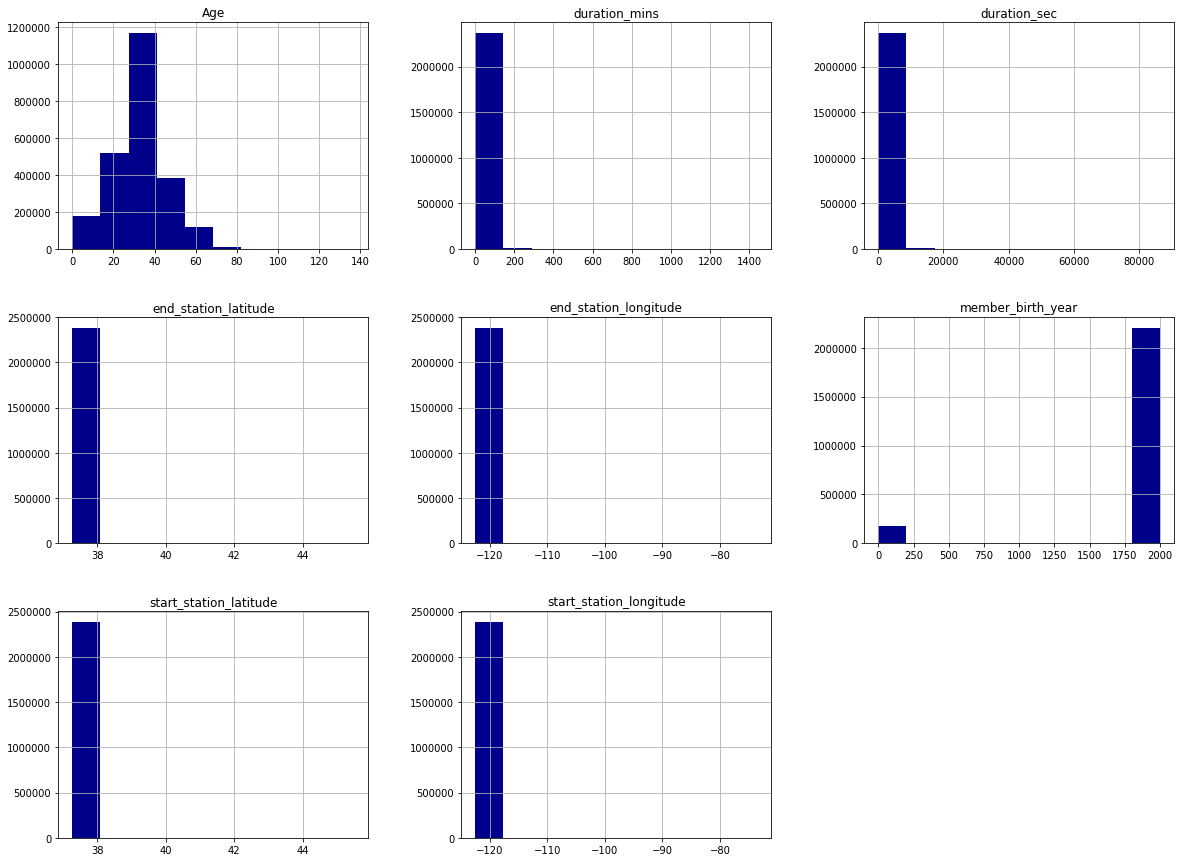

In [37]:
plt.figure(figsize=[8, 10])
df_copy.hist(color='DarkBlue',figsize= (20,15) );

In [38]:
# default parameters for visualization.
sb.set_style('darkgrid')

In [39]:
# Distribution of gender
(df_copy.member_gender.value_counts(sort=True, normalize=True)*100)

Male     74.16
Female   24.33
Other     1.51
Name: member_gender, dtype: float64

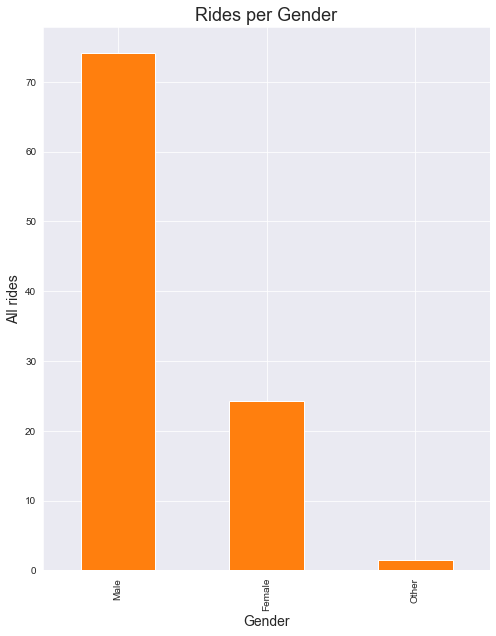

In [40]:
plt.figure(figsize=[8, 10])
(df_copy.member_gender.value_counts(sort=True, normalize=True)*100).plot.bar(color = sb.color_palette()[1]);
plt.title("Rides per Gender", fontsize=18)
plt.ylabel("All rides", fontsize=14)
plt.xlabel("Gender", fontsize=14);

#### The most trips are taken by male 

In [41]:
#Distribution of users
(df_copy.user_type.value_counts(sort=True, normalize=True)*100)

Subscriber   83.61
Customer     16.39
Name: user_type, dtype: float64

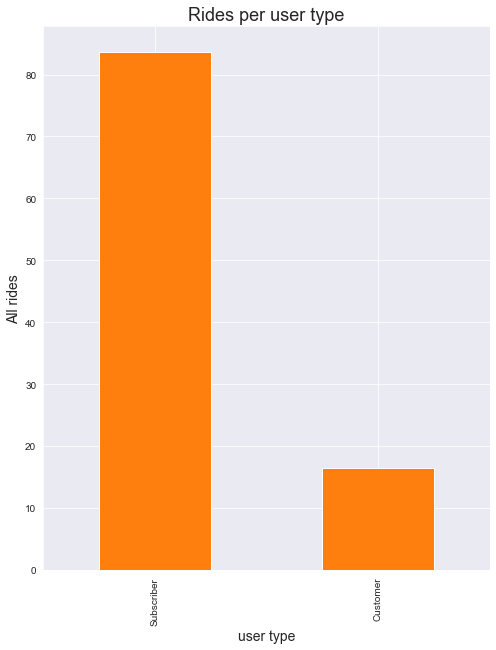

In [42]:
plt.figure(figsize=[8, 10])
(df_copy.user_type.value_counts(sort=True, normalize=True)*100).plot.bar(color = sb.color_palette()[1])
plt.title("Rides per user type", fontsize=18)
plt.ylabel("All rides", fontsize=14)
plt.xlabel("user type", fontsize=14);

#### The most  rides is by users of the type subscribers.

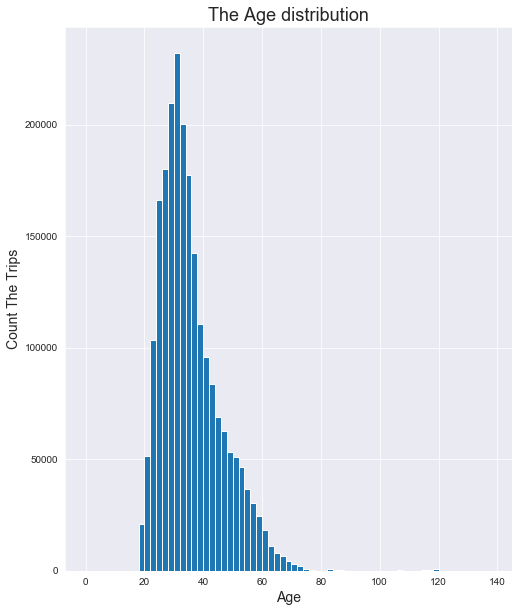

In [43]:
plt.figure(figsize=[8, 10])
df_age = df_copy.query('Age > 0')
bins = np.arange(0, df_age['Age'].max()+2, 2)
plt.hist(data = df_age, x = 'Age', bins = bins)
plt.title("The Age distribution", fontsize=18)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Count The Trips', fontsize=14);

In [44]:
# Separating the invalid ages
df_outliers_age_100 = df_copy[(df_copy.Age > 100)]

In [45]:
df_outliers_age_100.Age.value_counts()

118    632
107    262
115    218
116    173
117    171
130     23
104     18
114     12
106     12
110      7
137      5
109      4
129      3
131      2
112      2
Name: Age, dtype: int64

#### Some users put wrong data.  so I will insert 0 in the according rows. 

In [46]:
# separating the valid ages
df_valid = df_copy[(df_copy.Age <= 100)]

In [47]:
# Any one have invalid ages setting columns 'member_birth_year' and 'Age' to 0
df_outliers_age_100.member_birth_year = 0
df_outliers_age_100.Age = 0

C:\Users\abdulrahman\anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [48]:
df_outliers_age_100.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,Age,duration_mins
287,581,2017-12-31 18:10:46.556,2017-12-31 18:20:28.352,274,Oregon St at Adeline St,37.86,-122.27,173,Shattuck Ave at 55th Ave,37.84,-122.26,3050,Subscriber,0,Male,0,9.68
1751,370,2017-12-30 17:17:54.969,2017-12-30 17:24:05.481,207,Broadway at Coronado Ave,37.84,-122.25,173,Shattuck Ave at 55th Ave,37.84,-122.26,456,Subscriber,0,Male,0,6.17
3119,457,2017-12-29 18:24:08.722,2017-12-29 18:31:46.008,207,Broadway at Coronado Ave,37.84,-122.25,173,Shattuck Ave at 55th Ave,37.84,-122.26,1238,Subscriber,0,Male,0,7.62
3259,613,2017-12-29 17:20:22.096,2017-12-29 17:30:35.527,173,Shattuck Ave at 55th Ave,37.84,-122.26,207,Broadway at Coronado Ave,37.84,-122.25,1238,Subscriber,0,Male,0,10.22
5246,271,2017-12-28 16:48:41.310,2017-12-28 16:53:12.645,158,Shattuck Ave at Telegraph Ave,37.83,-122.26,173,Shattuck Ave at 55th Ave,37.84,-122.26,173,Subscriber,0,Male,0,4.52


In [49]:
# append the dataframes in new dataframe
df_valid = df_valid.append(df_outliers_age_100, sort=False, ignore_index=True)

In [50]:
# making a copy 
df2_copy = df_valid.copy()

#### the values for age and birth year have been corrected. I want to segment the age values into age groups to make further bivariate or multivariate analysis more comfortable

In [51]:
df2_copy['Gage'] = pd.cut(df2_copy.Age, [0,24,34,44,54,64,74,84,94,100], labels =['15-24', '25-34','35-44', '45-54','55-64', '65-74','75-84', '85-94','95-100'])

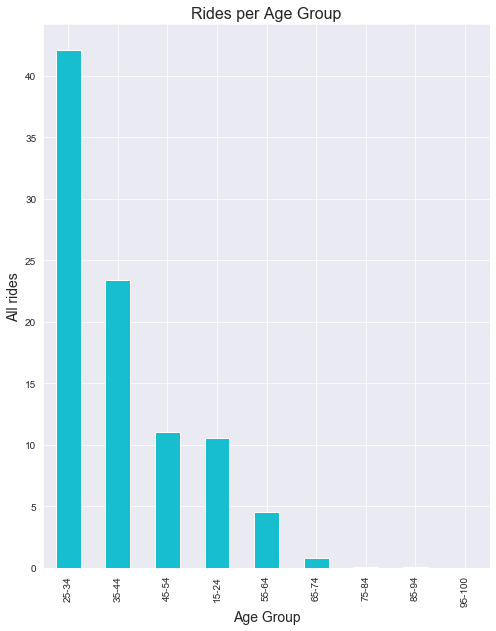

In [52]:
plt.figure(figsize=[8, 10])
x=len(df2_copy)
(df2_copy.Gage.value_counts()/x*100).plot.bar(color = sb.color_palette()[9]);
plt.title("Rides per Age Group", fontsize=16)
plt.ylabel('All rides', fontsize=14)
plt.xlabel('Age Group', fontsize=14);

#### The most user they are age group from 25 to 34

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

The most the rides 85% were done by subscriber type. 
 the most rides from male 74%, whereas female  for 24%. 
The most user they are age group from 25 to 34. 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

firstly we go to go for the age instead year of birth . so adding and calculating this column has been necessary. In addition, I took a closer look at the values of the column 'Age' and decided to set every value above 100 years to 0. and remove outliers in age instead of mean. and we create new column 'Gage' and put it into the age value: start with 15 to 24 years, till 95 to 100 year.

## Bivariate Exploration

Now i will to analyze which user group, segmented by age and gender uses the FordGoBike

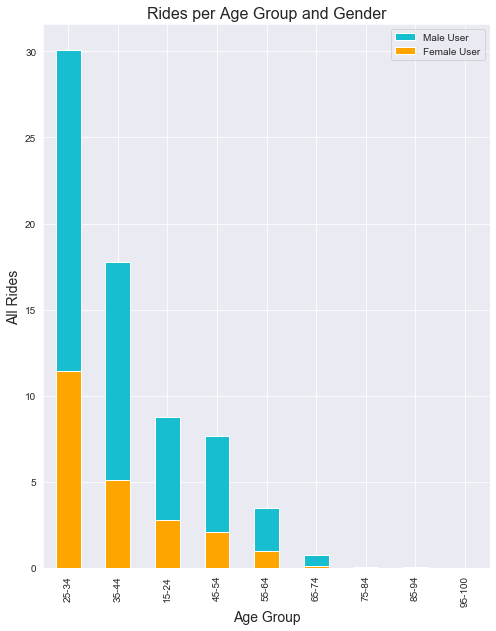

In [53]:
df2_male = df2_copy[(df2_copy.member_gender == "Male")]
df2_female = df2_copy[(df2_copy.member_gender == "Female")]
x=len(df2_copy)
q=len(df2_copy)
plt.figure(figsize=[8, 10])
(df2_male.Gage.value_counts() / x*100).plot.bar(color = sb.color_palette()[9], label='Male User');
(df2_female.Gage.value_counts() / q*100).plot.bar(color = 'orange', label='Female User');
plt.legend(loc='upper right')
plt.title("Rides per Age Group and Gender", fontsize=16)
plt.ylabel('All Rides', fontsize=14)
plt.xlabel('Age Group', fontsize=14);

#### The most user they are age group from 25 to 34 and they are male

In [54]:
df2_without_age_nan = df2_copy[(df2_copy.Age.notnull()) &((df2_copy.member_gender == "Male") |(df2_copy.member_gender == "Female"))]

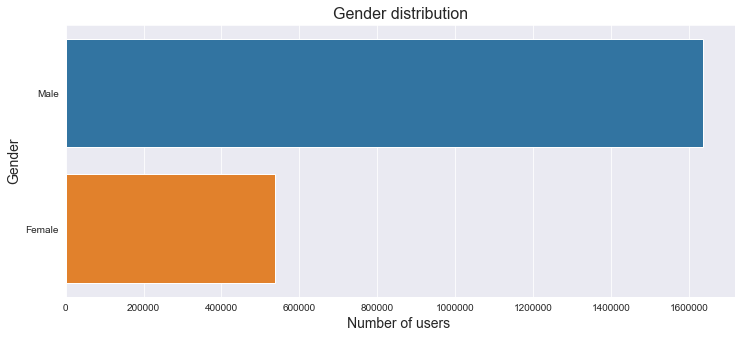

In [71]:
plt.figure(figsize=[12, 5])
sb.countplot(data = df2_without_age_nan, y = 'member_gender')
plt.title('Gender distribution', fontsize=16)
plt.xlabel('Number of users ', fontsize=14)
plt.ylabel('Gender', fontsize=14);

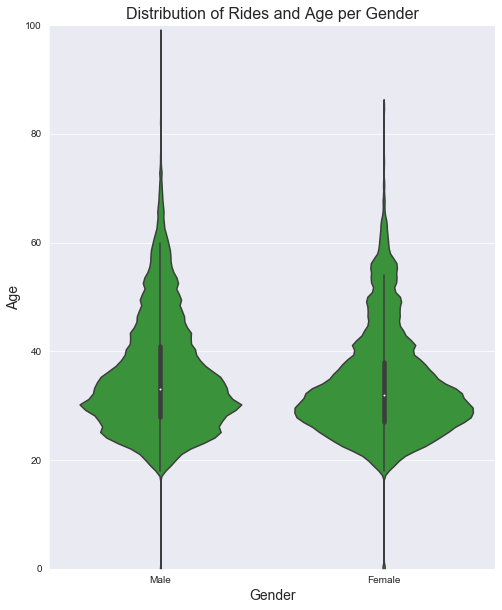

In [56]:
plt.figure(figsize=[8, 10])
sb.violinplot(data = df2_without_age_nan, x = 'member_gender', y = 'Age', color = sb.color_palette()[2])
plt.title("Distribution of Rides and Age per Gender", fontsize=16)
plt.ylabel("Age", fontsize=14)
plt.xlabel("Gender", fontsize=14)
plt.ylim([0,100]);

 that within the group of rides done by male users, the age distribution a bit more stretched towards higher ages. that the group of female users is denser around users aging around 30 years.

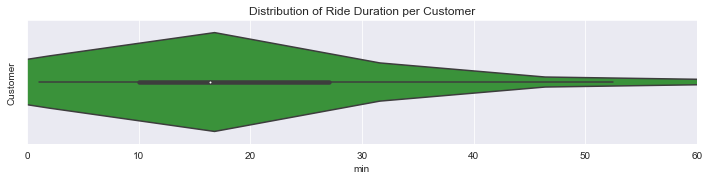

In [57]:
plt.figure(figsize=[12, 5])
df2_customer = df2_copy[(df2_copy.user_type == "Customer")]
plt.subplot(2, 1, 1)
sb.violinplot(x='duration_mins', data = df2_customer, color = sb.color_palette()[2], label ="Customer")
plt.title("Distribution of Ride Duration per Customer")
plt.xlabel("min")
plt.ylabel("Customer")
plt.xlim(0,60);

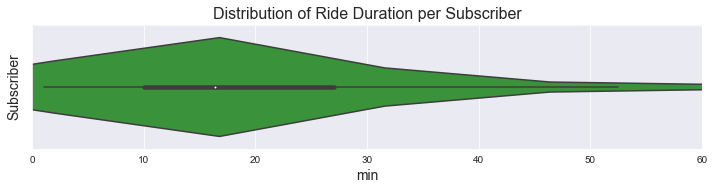

In [58]:
plt.figure(figsize=[12, 5])
df2_subscriber = df2_copy[(df2_copy.user_type == "Subscriber")]
plt.subplot(2, 1, 1)
sb.violinplot(x='duration_mins', data = df2_customer, color = sb.color_palette()[2], label ="Subscriber")
plt.title("Distribution of Ride Duration per Subscriber",fontsize=16)
plt.xlabel("min", fontsize=14)
plt.ylabel("Subscriber", fontsize=14)
plt.xlim(0,60);

Customers have longer rides than the group of subscribers.
 

In [59]:
Sno_outliers = df2_subscriber[(df2_subscriber.duration_sec <= 14400)]

In [60]:
#outlying rides removed
print(str(len(df2_subscriber) - len(Sno_outliers)) )

2139


### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?
The most user they are age group from 25 to 34 and they are male, and also that female users are generally younger than male users. 

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?
About the duration of rides, the subscribers have shorter trips than regular customers.

## Multivariate Exploration

Now i will to explore, how the number of rides and the duration differs number of subscribers for each of gender and age group.

In [61]:
# keep it on male and female only
Skeep_male_female = Sno_outliers[(Sno_outliers.member_gender != "Other")]

In [62]:
Skeep_male_female.member_gender.value_counts()

Male      1467829
Female     457350
Name: member_gender, dtype: int64

In [63]:
Srides= Skeep_male_female.groupby(['member_gender', 'Gage']).size()
Srides = Srides.reset_index(name = 'count')
Srides = Srides.pivot(index = 'Gage', columns = 'member_gender', values = 'count')
Srides.sample(3)

member_gender,Female,Male
Gage,,
95-100,0,88
45-54,44085,191880
15-24,50555,157537


In [64]:
Sduration = Skeep_male_female.groupby(['member_gender', 'Gage'])['duration_sec'].agg('sum')
Sduration = Sduration 
Sduration = Sduration.reset_index(name = 'duration_min')
Sduration = Sduration.pivot(index = 'Gage', columns = 'member_gender', values = 'duration_min')
Sduration.sample(3)

member_gender,Female,Male
Gage,,
85-94,135512.00,245768.00
65-74,1518928.00,11204631.00
95-100,nan,48124.00


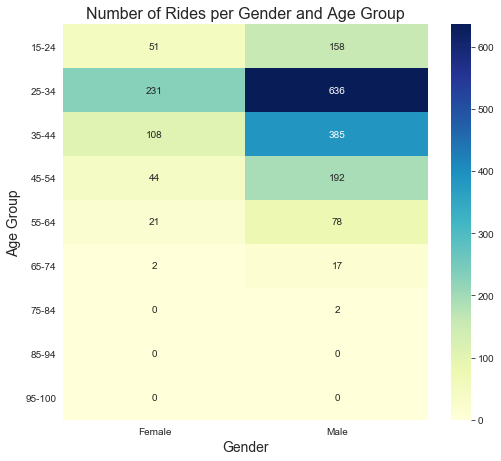

In [70]:
plt.figure(figsize = [18, 16])
plt.subplot(2, 2, 1)
sb.heatmap(Srides/1000, annot = True, fmt =  '.0f',  cmap = 'YlGnBu')
plt.title("Number of Rides per Gender and Age Group", fontsize=16)
plt.ylabel("Age Group", fontsize=14)
plt.xlabel("Gender", fontsize=14)
plt.yticks(rotation=360);

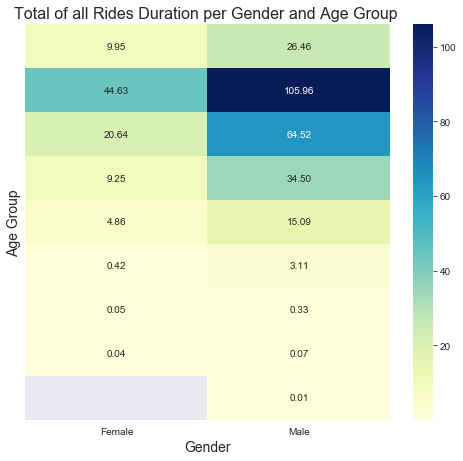

In [69]:
plt.figure(figsize = [18, 16])
plt.subplot(2, 2, 2)
sb.heatmap(Sduration/60/60/1000, annot = True, fmt =  '.2f',  cmap = 'YlGnBu', yticklabels=False)
plt.title("Total of all Rides Duration per Gender and Age Group ", fontsize=16)
plt.ylabel("Age Group", fontsize=14)
plt.xlabel("Gender", fontsize=14);


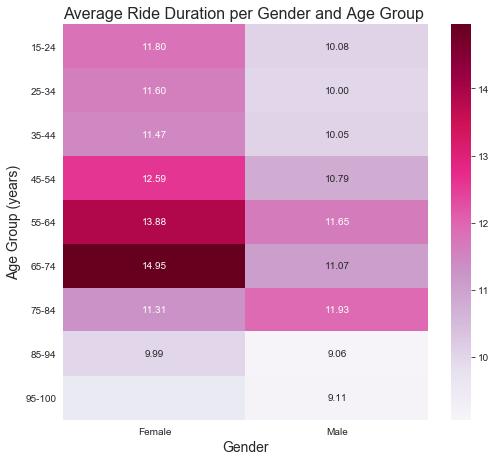

In [67]:
SDS = Sduration / Srides
plt.figure(figsize = [18, 16])
plt.subplot(2, 2, 3)
sb.heatmap(SDS/60, annot = True, fmt =  '.2f',  cmap = 'PuRd');
plt.title("Average Ride Duration per Gender and Age Group ", fontsize=16)
plt.ylabel("Age Group (years)", fontsize=14)
plt.xlabel("Gender", fontsize=14)
plt.yticks(rotation=360);

###  Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

I observed that the usage in terms of number of rides and the duration do not diverge between much number of gender and age group .
 That means, the group with most rides also has the highest total ride duration. 

I will talk about the first two heatmaps show, which sub segments are using FordGoBike extensively and which are not. 
the darker the colorization, the more important the segment and 
the lighter the colorizationt the less important the segment

 Based on  these heatmaps, one can easily identify which segment can be marketed. 

The group from 45 to 54 year ,this group does not use the bikes as much as the younger groups

### Were there any interesting or surprising interactions between features?

About The third heatmap. the duration per trip shows that woman tend to have little longer enduring rides than man.
 also, rides of older users tend to endure longer than rides of younger users.
 

In [68]:
df2_copy.to_csv("fordgobike_explain.csv", header=True, index=False)